# Lab-3: Logistic Regression
_____
##### In this lab, you will apply Logistic Regression to predict survival on Titanic and learn to analyze classification results.

### Objectives:
1. Visualize LogReg basics
2. Split unbalanced data
3. Apply Logistic regression
4. Analyze results (Confusion Matrix, Precision, Recall)
-----

### Concepts Visualization

Here are main equations behind Logistic Regression:

$\hat p(x) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x)}}$

$L(\hat{p}(x_i), y_i) = -y_i\log (\hat{p}(x_i)) - (1 - y)_i\log (1 -\hat{p}(x_i))$

$L(\hat{p}(x_i), y_i) = \left \\{\begin{matrix}
\ - log (\hat{p}(x_i)), & y_i=1\\ 
\ - log (1 -\hat{p}(x_i)), & y_i=0
\end{matrix}\right.$

$\hat{y} = \left\\{\begin{matrix}
1 && \hat p(x) > threshold\\ 
0 && otherwise 
\end{matrix}\right.$


<br>

1. What problem does Logistic Regression solve?
2. What is the output of Logistic Regression model?
2. Why can't we use average MSE as a loss function (as we did in Linear Regression)?
3. How can we adapt Logistic Regression to solve a multiclass problem?

<br>
Let's now see how the shape of

$\hat p(x)$
depends on its parameters:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#### Task: Implement the sigmoid function using numpy lib.

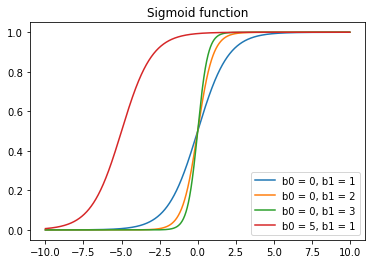

In [4]:
x = np.arange(-10, 10, 0.01)

def plot(b0, b1):
    # Edit the next line to implement the probability formulation.
    p = 1 / (1 + np.exp(-(b0 + b1 * x)))
    label = "b0 = {}, b1 = {}".format(b0, b1)
    plt.plot(x, p, label=label)

plot(0,1)
plot(0,2)
plot(0,3)
plot(5,1)
plt.legend()
plt.title('Sigmoid function')
plt.show()

What is controlled by parameters b0, b1?  
<br><br> 
Let's now visualize the components of the Loss function:

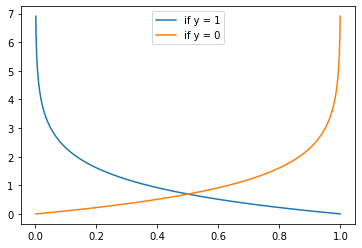

In [7]:
x = np.arange(0.001, 1, 0.001)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.plot(x,y1, label="if y = 1")
plt.plot(x,y0, label="if y = 0")
plt.legend()
plt.show()

What are the benefits of using logarithms in the loss function?   <br><br>

### Loading Data

In [12]:
import pandas as pd
data = pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 92.2+ KB


In [ ]:
# removing name column
data = data.drop(['name'], axis = 1)

What do we know about the output class distribution? What percentage of people had survived? Is it important to have the same distribution in test and train sets? Why?

##### Task. Find and print the proporion of the positive (survived) class in the dataset, then split data to train and test sets preserving that proportion. Finally, as a check, calculate and print proportions in resulting sets.

In [28]:
from sklearn.model_selection import train_test_split

y = data['survived']
X = data.drop(['survived'],axis=1)
# find and print the proportion of positive samples in data
print('% of positive samples in whole data:', 100 * (y.sum()/y.shape[0]))
# split data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

# find and print the proportion of positive samples in train and test sets, make sure they are approx same
print('% of positive samples in train set:', 100 * (y_train.sum()/y_train.shape[0]))
print('% of positive samples in test set:', 100 * (y_test.sum()/y_test.shape[0]))

% of positive samples in whole data: 38.19709702062643
% of positive samples in train set: 38.2043935052531
% of positive samples in test set: 38.16793893129771


#### Data preprocessing

... is done for you! But you are free to change it if needed.

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(x_train)
x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    print(new_feats)
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

[[1. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]]
[[1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [1. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 1.]
 [0. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [0. 0. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [1. 0. 1.]
 [1. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [1. 1. 0.

In [ ]:
x_train

### Logistic Regression

Now we are ready to see Logistic Regression in practice. 

#### Task. Fit Logistic Regression and output Accuracy, Precision, and Recall scores on test set.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# fit Logistic Regression
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)

# caclulate and print metrics
print('Accuracy of score of logistic regression', metrics.accuracy_score(y_test,y_test_pred))
print('Recall of score of logistic regression', metrics.recall_score(y_test,y_test_pred))
print('Precision of score of logistic regression', metrics.precision_score(y_test,y_test_pred))
print('F1-score of score of logistic regression', metrics.f1_score(y_test,y_test_pred))

Accuracy of score of logistic regression 0.7786259541984732
Recall of score of logistic regression 0.74
Precision of score of logistic regression 0.6981132075471698
F1-score of score of logistic regression 0.7184466019417476


What about Logistic Regression Coefficients? Can we interpret them?

In [34]:
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

('pclass', -1.742479115510312)
('age', -1.7360554725696107)
('sibsp', -1.4431557646515096)
('parch', 0.11501887699087388)
('fare', 0.2734454580965674)
('sex_male', -2.446121628392187)
('embarked_Q', -0.5641063290012717)
('embarked_S', -0.6021808162712113)


How can we choose a threshold of prediciton? Let's try different ones and see their effect on metrics.


#### Task:
#### Predict the probability using the logistic regression classifier object.
#### For each threshold thresh, give positive label 1 if the probability is greater that thresh and negative otherwise.
#### Calculate Accuracy, Precision, and Recall values for each of the given threshold values
#### Plot them on the same graph (threshold on x-axis and metric value on y-axis) with different colours and add legends, titles, and axes labels.

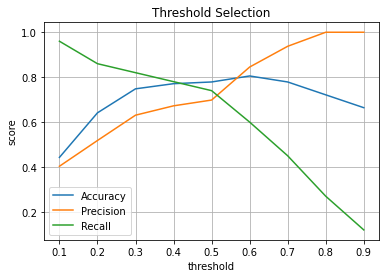

In [37]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# calculate metrics for each threshold above and plot the result as below.
metrics_results = [[], [], []]

y_pred_proba1 = clf.predict_proba(x_test)[:, 1]
for thresh in thresholds:
    # Write:
    # One line to get predicition at threshold thresh.
    y_pred_threshold = (y_pred_proba1 >= thresh).astype(bool)
    # Three more lines to record the accuracy, precision, and recall respictively.
    accuracy = metrics.accuracy_score(y_test, y_pred_threshold)
    recall = metrics.recall_score(y_test, y_pred_threshold)
    precision = metrics.precision_score(y_test, y_pred_threshold)
    # Append each to the metrics result, 
    metrics_results[0].append(accuracy)
    metrics_results[1].append(precision)
    metrics_results[2].append(recall)
    # result[0] for accuracies, result[1] for precision, result[2] for recall.
    
    pass

# Make 3 plots, one for each metric.
# Put the appropriate label at each plot.
plt.plot(thresholds, metrics_results[0],label='Accuracy')
plt.plot(thresholds, metrics_results[1],label='Precision')
plt.plot(thresholds, metrics_results[2],label='Recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()


### Confusion matrix

1. Why one may need confusion matrix? 
2. What new information does it show? 

<table><tr><td><img src='https://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png'></td><td><img src='http://wiki.fast.ai/images/6/61/Confusion_matrix.png' style='width: 400px;'></td></tr></table>

<img align='center' src='https://www.researchgate.net/profile/Emanuele_Principi/publication/324226324/figure/fig2/AS:612091408941056@1522945372985/Normalized-confusion-matrix-of-best-performing-models-on-devel-subset-a-SVM.png' style='width: 350px;'>


In [41]:
titanic_true_labels = np.array(y_test)
titanic_pred_labels = y_test_pred

In [42]:
sample_true_labels = np.array([2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0])
sample_pred_labels = np.array([2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2])

#### Task. You need to fill in the function which builds a Confusion Matrix based on true and predicted labels. Your solution should be generalizable to any number of classes. You can assume that classes are represented as numbers (0,1,2,3,...)

In [ ]:
def calc_confusion_matrix(true_labels, pred_labels):
    # Calculate a confusion matrix: 
    # True labels along Y axis, Predicted ones along X axis
    num_of_labels = np.unique(true_labels).size()
    cm = np.zeros(num_of_labels,num_of_labels)
    
    for t, p in zip(true_labels, pred_labels):
        cm[t][p] +=1
    return cm

titanic_cm = calc_confusion_matrix(titanic_true_labels, titanic_pred_labels)
sample_cm = calc_confusion_matrix(sample_true_labels, sample_pred_labels)
print('Confusion Matrix for Titanic:\n', titanic_cm, '\n')
print('Confusion Matrix for Sample set:\n', sample_cm)

In [ ]:
# Run this block of code to see what your result should look like
from sklearn.metrics import confusion_matrix
print('TRUE Confusion Matrix for Titanic:\n', confusion_matrix(titanic_true_labels, titanic_pred_labels), '\n')
print('TRUE Confusion Matrix for Sample set:\n', confusion_matrix(sample_true_labels, sample_pred_labels))